# Algos
- LSTM
- Gauss RBM + SciKit RFC
- PyRBM
- Custom DBN

In [78]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam 

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import BernoulliRBM
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import collections 
import random

# Noisy Data

In [29]:
csv_filename = "MXNWSS.csv"
df = pd.read_csv(csv_filename)

window_length = 5 
t_arr = df["value"].to_numpy().reshape(-1, 1)
SS = StandardScaler()

t_arr = SS.fit_transform(t_arr).flatten()

X = []
y = []

# print("Rearranging Data")
for i in range(len(t_arr)-window_length):
    t_row = []
    for j in t_arr[i:i+window_length]:
        t_row.append([j])
    X.append(t_row)
    y.append(t_arr[i + window_length])

X = np.array(X)
y = np.array(y)

# print(X.shape, y.shape)

X_train = X[:600]
X_valid = X[:800]
X_test = X[:1000]

y_train = y[:600]
y_valid = y[:800]
y_test = y[:1000]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1)

# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape)

# LSTM

In [32]:
model = Sequential([
    layers.InputLayer((window_length, 1)),
    layers.SimpleRNN(64, return_sequences=True),
    layers.SimpleRNN(64),
    layers.Dense(4),
    layers.Dense(1)
])

# print(model.summary())

cp = ModelCheckpoint("LSTMTestModel/", save_best_only=True)
model.compile(
    loss = MeanSquaredError(),
    optimizer = Adam(learning_rate=0.0001),
    metrics = [RootMeanSquaredError()]
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    epochs = 10,
    callbacks = [cp],
    verbose = 2
)



Epoch 1/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 9s - loss: 1.1949 - root_mean_squared_error: 1.0931 - val_loss: 0.9176 - val_root_mean_squared_error: 0.9579 - 9s/epoch - 474ms/step
Epoch 2/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.7952 - root_mean_squared_error: 0.8917 - val_loss: 0.7676 - val_root_mean_squared_error: 0.8761 - 5s/epoch - 248ms/step
Epoch 3/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.7277 - root_mean_squared_error: 0.8531 - val_loss: 0.7270 - val_root_mean_squared_error: 0.8527 - 5s/epoch - 271ms/step
Epoch 4/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.6941 - root_mean_squared_error: 0.8331 - val_loss: 0.7120 - val_root_mean_squared_error: 0.8438 - 5s/epoch - 256ms/step
Epoch 5/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.6838 - root_mean_squared_error: 0.8269 - val_loss: 0.7078 - val_root_mean_squared_error: 0.8413 - 5s/epoch - 273ms/step
Epoch 6/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.6768 - root_mean_squared_error: 0.8227 - val_loss: 0.7043 - val_root_mean_squared_error: 0.8392 - 5s/epoch - 281ms/step
Epoch 7/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.6735 - root_mean_squared_error: 0.8207 - val_loss: 0.7006 - val_root_mean_squared_error: 0.8370 - 5s/epoch - 246ms/step
Epoch 8/10
19/19 - 0s - loss: 0.6708 - root_mean_squared_error: 0.8190 - val_loss: 0.7047 - val_root_mean_squared_error: 0.8395 - 227ms/epoch - 12ms/step
Epoch 9/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.6717 - root_mean_squared_error: 0.8196 - val_loss: 0.6998 - val_root_mean_squared_error: 0.8365 - 5s/epoch - 243ms/step
Epoch 10/10


INFO:tensorflow:Assets written to: LSTMTestModel\assets


INFO:tensorflow:Assets written to: LSTMTestModel\assets


19/19 - 5s - loss: 0.6719 - root_mean_squared_error: 0.8197 - val_loss: 0.6979 - val_root_mean_squared_error: 0.8354 - 5s/epoch - 261ms/step


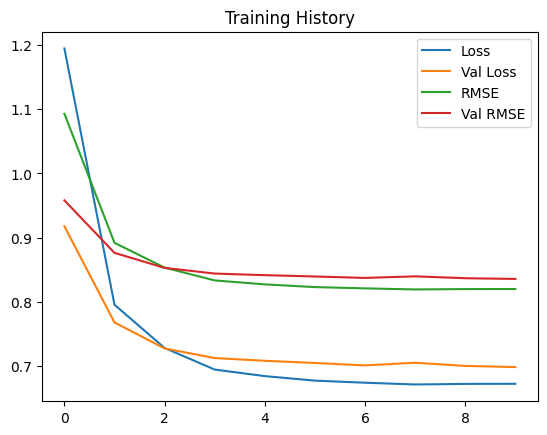

In [33]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.plot(history.history["root_mean_squared_error"], label="RMSE")
plt.plot(history.history["val_root_mean_squared_error"], label="Val RMSE")
plt.title("Training History")
plt.legend()
plt.show()

view_length = 100
plt.figure(figsize=(10, 5))
plt.plot(SS.inverse_transform(model.predict(X_test))[:view_length], label="Model Output")
plt.plot(y_test[:view_length], label="Actual")
plt.title("Viewing Predictions")
plt.legend()
plt.show()

# SciKit

In [86]:
concatenated_data = pd.read_csv("Concatenated Data.csv")
# raw_dataset = concatenated_data[["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "sealevelpressure", "conditions"]]
raw_dataset = concatenated_data[["temp", "feelslike", "humidity", "windspeed", "sealevelpressure", "conditions"]]
raw_dataset["conditions"] = [word.replace(", ", "\n") if ("," in word) else word for word in raw_dataset["conditions"]]

LE = LabelEncoder()

SS = StandardScaler()

ScalerObjects = []

for column in raw_dataset.columns:
    if column == "conditions":
        continue 
    
    Scaler = BernoulliRBM()
    raw_dataset[column] = Scaler.fit_transform(raw_dataset[[column]])

raw_dataset["conditions"] =  LE.fit_transform(raw_dataset["conditions"])
# raw_dataset["tempmax"] = SS.fit_transform(raw_dataset["tempmax"])
# print(LE.classes_)

# exit
# y = raw_dataset.pop("conditions").to_numpy()
# X = raw_dataset.to_numpy()

t_arr = raw_dataset.copy().to_numpy()
window_length = 1

X = []
y = []

# print("Rearranging Data")
for i in range(len(t_arr)-window_length):
    t_row = []
    for j in t_arr[i:i+window_length]:
        t_row.append(j[:-1])
    t_row = np.array(t_row).flatten()
    X.append(t_row)
    y.append(t_arr[i + window_length][-1])

X = np.array(X)
y = np.array(y)

counts = dict(collections.Counter(y))
max_count = max(counts.values())
# print(counts, max_count)

# Adding Elements (Eessential)
for key, value in counts.items():
    curX = []
    curY = []
    li, = np.where(y == key)
    for i in range((max_count - value) * 10):
        ci = random.choice(li)
        curX.append(X[ci])
        curY.append(y[ci])
    tX = X.tolist()
    tY = y.tolist()
    tX.extend(curX)
    tY.extend(curY)
    X = np.array(tX)
    y = np.array(tY)        

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


C:\Users\Alaric\AppData\Local\Temp\ipykernel_14920\261078787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset["conditions"] = [word.replace(", ", "\n") if ("," in word) else word for word in raw_dataset["conditions"]]
C:\Users\Alaric\AppData\Local\Temp\ipykernel_14920\261078787.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset[column] = Scaler.fit_transform(raw_dataset[[column]])
C:\Users\Alaric\AppData\Local\Temp\ipykernel_14920\261078787.py:17: SettingWithCopyWarning: 
A valu

In [88]:
X_train[2]

array([1., 1., 1., 1., 0.])

In [83]:
# pipe = Pipeline([
#     ('rbm1', BernoulliRBM(n_components = 5, learning_rate = 0.01, batch_size=100, n_iter=10, verbose = 1)),
#     ('rfc', RandomForestClassifier())
# ])
# print("Initial X_train:", X_train[0])
# rbm1 = BernoulliRBM(n_components=10, learning_rate=0.01, batch_size = 10, n_iter = 10, verbose = 1)
# X_train = rbm1.fit_transform(X_train, y_train)
# print("After Training X_train:", X_train[0])

classifiers = [
    ("random forest", RandomForestClassifier()),
    ("ada boost", AdaBoostClassifier()),
    
    # ("gaussian process", GaussianProcessClassifier()),
    ("decision tree", DecisionTreeClassifier()),
    ("mlp", MLPClassifier()),
    ("svm", SVC())
]

# Random Forest - 86%

print("X train shape:", X_train.shape)

for (name, _clf) in classifiers:

    predictor = Pipeline([
        # ('rbm1', BernoulliRBM(n_components = 10, learning_rate = 0.01, batch_size = 1, n_iter = 10, verbose = 1)),
        # ('ss1', StandardScaler()),
        # ('rbm2', BernoulliRBM(n_components = 5, learning_rate = 0.01, batch_size = 10, n_iter = 10, verbose = 1)),
        # ('rbm3', BernoulliRBM(n_components = 5, learning_rate = 0.01, batch_size = 10, n_iter = 10, verbose = 1)),
        # ('rbm4', BernoulliRBM(n_components = 5, learning_rate = 0.01, batch_size = 10, n_iter = 10, verbose = 1)),
        # ('rbm5', BernoulliRBM(n_components = 5, learning_rate = 0.01, batch_size = 10, n_iter = 10, verbose = 1)),
        (name, _clf)
    ])
    predictor.fit(X_train, y_train)
    y_pred = predictor.predict(X_test)
    print(name, accuracy_score(y_test, y_pred))

    break 

# predictor = SVC(C=2.0) - 24%




# predictor.fit(X_train, y_train)
# y_pred = predictor.predict(X_test)

# pipe.fit(X_train, y_train)

# y_pred = pipe.predict(X_test)
# r_cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix = r_cm, display_labels = LE.classes_)

# disp.plot()
# plt.show()


X train shape: (29472, 5)
random forest 0.9758414766558089


In [ ]:
rbm1_params = {
    'rbm1__n_components': [50, 100, 150],
    'rbm1__learning_rate': [0.01, 0.05, 0.1],
    'rbm1__n_iter': [10, 20, 30],
    'rbm1__batch_size': [32, 64, 128]
}

# rbm2_params = {
#     'rbm2__n_components': [50, 100, 150],
#     'rbm2__learning_rate': [0.01, 0.05, 0.1],
#     'rbm2__n_iter': [10, 20, 30],
#     'rbm2__batch_size': [32, 64, 128]
# }

# rbm3_params = {
#     'rbm3__n_components': [50, 100, 150],
#     'rbm3__learning_rate': [0.01, 0.05, 0.1],
#     'rbm3__n_iter': [10, 20, 30],
#     'rbm3__batch_size': [32, 64, 128]
# }

grid_search = GridSearchCV(estimator=Pipeline(steps=[('rbm1', BernoulliRBM()),
                                                    # ('rbm2', BernoulliRBM(random_state=101)),
                                                    # ('rbm3', BernoulliRBM(random_state=101)),
                                                    ('RFC', RandomForestRegressor())]),
                           param_grid=[rbm1_params],
                           cv=3, n_jobs = -1, verbose = 3)

grid_search.fit(X_train, y_train)

# Step 6: Find out the model properties
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Store best parameters and best score to a variable
best_params  = grid_search.best_params_
best_score = grid_search.best_score_

# Access to the best trained model with best parameter combination
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: 